# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Achievement 6'
df_clean= pd.read_csv(os.path.join(path, 'Data','Cleanest_data.csv'), index_col= False)

In [3]:
df_clean = df_clean.drop('Unnamed: 0', axis=1)
df_clean.head()

,Company \n(Maker-if known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Quality
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Missing,Sao Tome,Above Average
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Missing,Togo,Below Average
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Missing,Togo,Average
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Missing,Togo,Average
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Missing,Peru,Average


# Data preparation 

In [4]:
df_clean.describe()

,REF,Review_Date,Cocoa_Percent,Rating
count,1934.000000,1934.000000,1934.000000,1934.00000
mean,1028.054292,2012.278180,71.719752,3.19545
std,555.505999,2.949334,6.367643,0.47933
min,5.000000,2006.000000,42.000000,1.00000
25%,565.000000,2010.000000,70.000000,3.00000
50%,1059.000000,2013.000000,70.000000,3.25000
75%,1494.000000,2015.000000,75.000000,3.50000
max,1952.000000,2017.000000,100.000000,5.00000


In [6]:
# adjusting the review date column so the scale is smaller to avoid bias
df_clean['Review_Year'] = df_clean['Review_Date'] - 2005.0
df_clean.head()

,Company \n(Maker-if known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Quality,Review_Year
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Missing,Sao Tome,Above Average,11.0
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Missing,Togo,Below Average,10.0
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Missing,Togo,Average,10.0
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Missing,Togo,Average,10.0
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Missing,Peru,Average,10.0


In [9]:
n = df_clean.columns
nl = n.tolist()
print(nl)

['Company\xa0\n(Maker-if known)', 'Specific_Bean_Origin_or_Bar_Name', 'REF', 'Review_Date', 'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type', 'Broad Bean_Origin', 'Quality', 'Review_Year']


In [12]:
# finally fixing the company name error
df_clean.rename(columns={'Company\xa0\n(Maker-if known)':'Company(Maker)'}, inplace=True)
df_clean.head()

,Company(Maker),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Quality,Review_Year
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Missing,Sao Tome,Above Average,11.0
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Missing,Togo,Below Average,10.0
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Missing,Togo,Average,10.0
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Missing,Togo,Average,10.0
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Missing,Peru,Average,10.0


In [15]:
# removing categorical variables and out of scale columns
df_test = df_clean.drop(columns=['REF','Review_Date','Company(Maker)','Specific_Bean_Origin_or_Bar_Name','Company_Location','Bean_Type','Broad Bean_Origin','Quality'])
df_test.head()

,Cocoa_Percent,Rating,Review_Year
0,63.0,3.75,11.0
1,70.0,2.75,10.0
2,70.0,3.00,10.0
3,70.0,3.50,10.0
4,70.0,3.50,10.0


In [14]:
# exporting the clean data now that I figured out the company column problem
df_clean.to_csv(os.path.join(path, 'Data','Cleanest_data.csv'))

# Elbow technique

In [16]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(df_test).score(df_test) for i in range(len(kmeans))]

score

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

[-95635.56463288519,
 -56631.24574435272,
 -37220.55989207735,
 -29156.16863107686,
 -21668.57786420828,
 -19278.13780647531,
 -14936.06769494231,
 -14899.940255193165,
 -11217.743719731377]

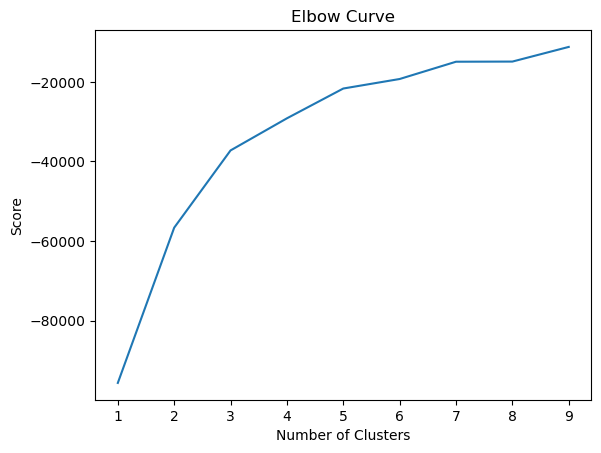

In [17]:
#ploting the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Determining clusters
This is not the cleanest example of the elbow technique. There is still some increasing after the intial flattening, but I think there is enough of a flattening to declare 5 clusters as the correct amount. 

# Running K means

In [18]:
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(df_test)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=5)

In [19]:
df_test['clusters'] = kmeans.fit_predict(df_test)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [20]:
df_test.head()

,Cocoa_Percent,Rating,Review_Year,clusters
0,63.0,3.75,11.0,2
1,70.0,2.75,10.0,0
2,70.0,3.00,10.0,0
3,70.0,3.50,10.0,0
4,70.0,3.50,10.0,0


In [22]:
df_test['clusters'].value_counts()

clusters
0    925
4    497
2    269
1    205
3     38
Name: count, dtype: int64

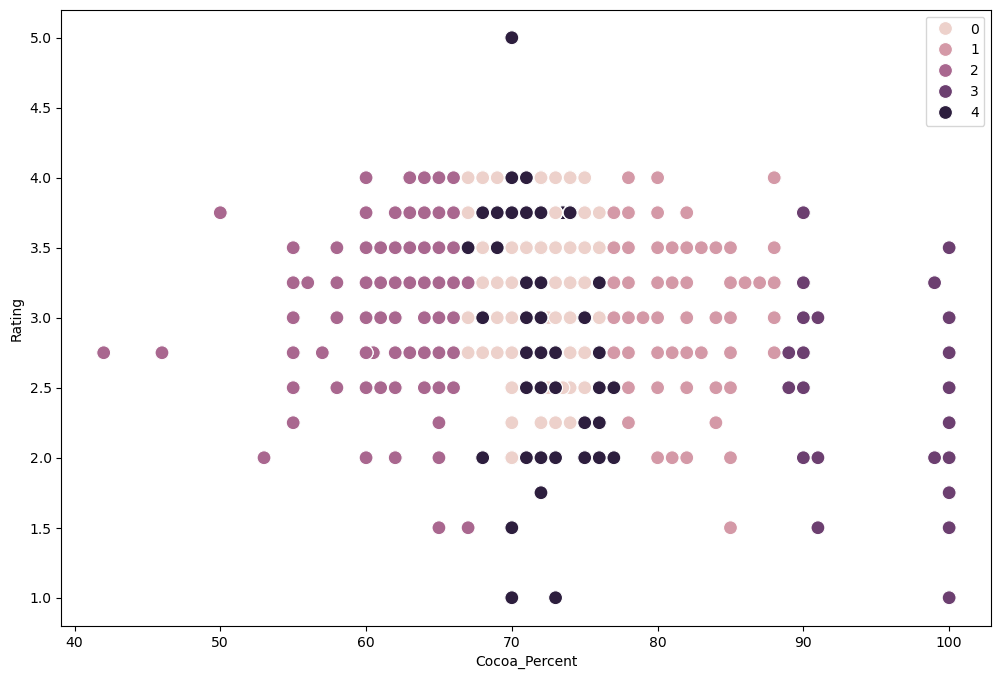

In [23]:
# plotting the cocoa percent vs rating now with clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_test['Cocoa_Percent'], y=df_test['Rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Cocoa_Percent') 
plt.ylabel('Rating') 
plt.show()

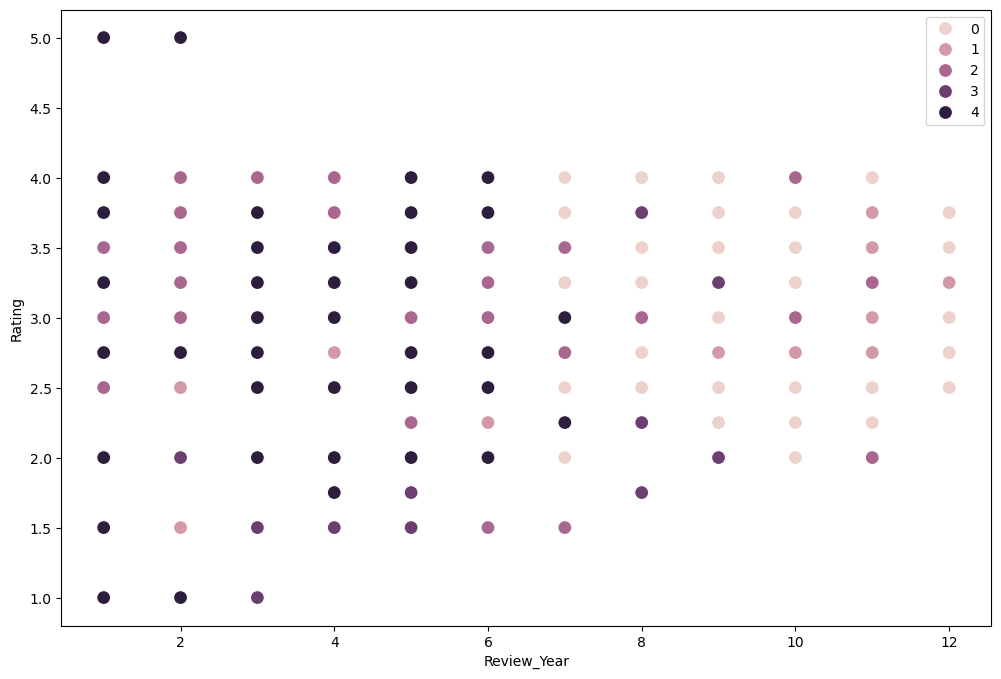

In [24]:
# plotting the Review_Year vs rating now with clusters
plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df_test['Review_Year'], y=df_test['Rating'], hue=kmeans.labels_, s=100) 

ax1.grid(False) 
plt.xlabel('Review_Year') 
plt.ylabel('Rating') 
plt.show()

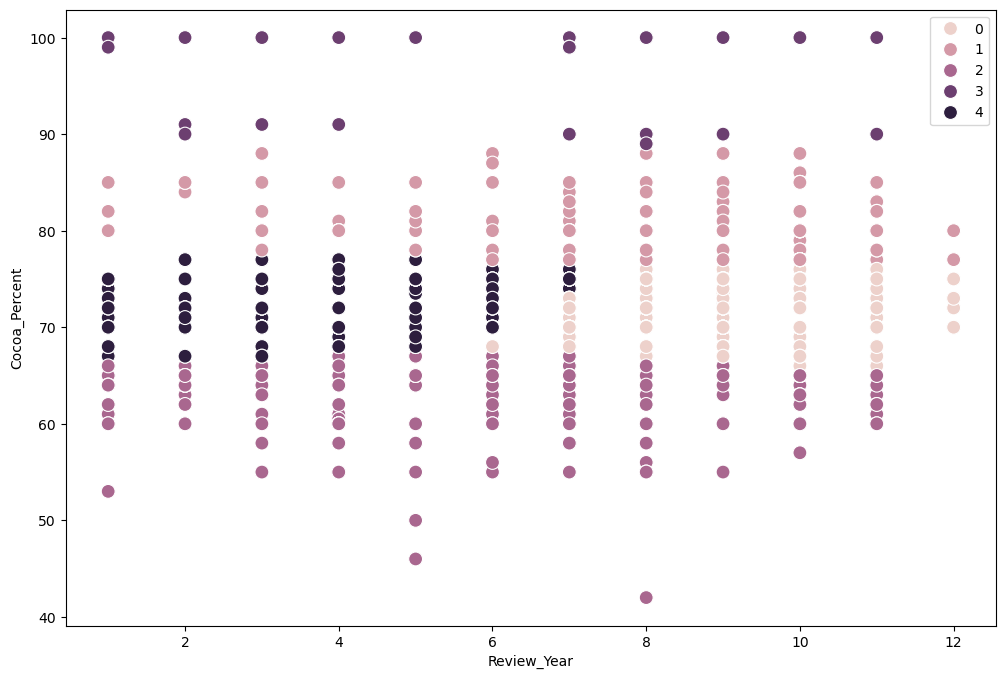

In [25]:
# plotting the Review_Year vs Cocoa Percent now with clusters
plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df_test['Review_Year'], y=df_test['Cocoa_Percent'], hue=kmeans.labels_, s=100) 

ax1.grid(False) 
plt.xlabel('Review_Year') 
plt.ylabel('Cocoa_Percent') 
plt.show()

In [32]:
df_test.loc[df_test['clusters'] == 4, 'cluster'] = 'darkest purple'
df_test.loc[df_test['clusters'] == 3, 'cluster'] = 'dark purple'
df_test.loc[df_test['clusters'] == 2, 'cluster'] = 'purple'
df_test.loc[df_test['clusters'] == 1, 'cluster'] = 'pink'
df_test.loc[df_test['clusters'] == 0, 'cluster'] = 'light pink'

In [33]:
df_test['cluster'].value_counts()

cluster
light pink        925
darkest purple    497
purple            269
pink              205
dark purple        38
Name: count, dtype: int64

In [34]:
df_test.groupby('cluster').agg({'Cocoa_Percent':['mean', 'median'], 
                         'Rating':['mean', 'median'], 
                         'Review_Year':['mean', 'median']})

Cocoa_Percent           Rating        Review_Year       
                        mean median      mean median        mean median
cluster                                                                
dark purple        96.263158  100.0  2.467105  2.625    6.447368    8.0
darkest purple     72.136821   72.0  3.200704  3.250    4.106640    4.0
light pink         71.058919   70.0  3.265676  3.250    9.237838    9.0
pink               81.253659   80.0  3.081707  3.000    7.819512    9.0
purple             62.488848   64.0  3.133829  3.250    6.104089    6.0

# Discussing Results

The most obvious clustering is around the realtionship between cocoa percentages and ratings. Seen in the median columns where each cluster is seperated it can be seen that the extremes of cocoa percentages results in the worst ratings for the overall product. 

For future analysis this cements the little interaction between the purely numerical information. The most important analysis will be the categorical combinined with the numerical.  